In [2]:
import nibabel as nib
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
hex_colors = sns.color_palette("Set2").as_hex()
print(hex_colors)

['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']


In [5]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [ ]:
raw_df_path = "/Users/emmatosato/Documents/PhD/ANM_Verona/data/dataframes/fdc/raw_df.pkl"
schaefer_path = "/Users/emmatosato/Documents/PhD/ANM_Verona/utils/masks/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii"
output_csv = "/Users/emmatosato/Documents/PhD/ANM_Verona/data/dataframes/fdc/df_gm_schaefer100.csv"


In [ ]:
df_raw = pd.read_pickle(raw_df_path)
X = df_raw.drop(columns="ID")
ids = df_raw["ID"].values

In [ ]:
schaefer_data = nib.load(schaefer_path).get_fdata()
schaefer_flat = schaefer_data.flatten()

assert X.shape[1] == schaefer_flat.shape[0], f"Shape mismatch: {X.shape[1]} vs {schaefer_flat.shape[0]}"


In [ ]:
parcel_labels = np.unique(schaefer_flat)
parcel_labels = parcel_labels[parcel_labels != 0]  # exclude background

X_parcellated = []
for p in parcel_labels:
    idx = np.where(schaefer_flat == p)[0]
    mean_vals = X.iloc[:, idx].mean(axis=1)
    X_parcellated.append(mean_vals)

In [ ]:
df_parcellated = pd.concat(X_parcellated, axis=1)
df_parcellated.columns = [f"Parcel_{int(p)}" for p in parcel_labels]
df_parcellated.insert(0, "ID", ids)

df_parcellated.to_csv(output_csv, index=False)
df_parcellated.head()

# Trial

In [49]:
import importlib
from analysis import plotting
importlib.reload(plotting)
from analysis.plotting import plot_ols_diagnostics

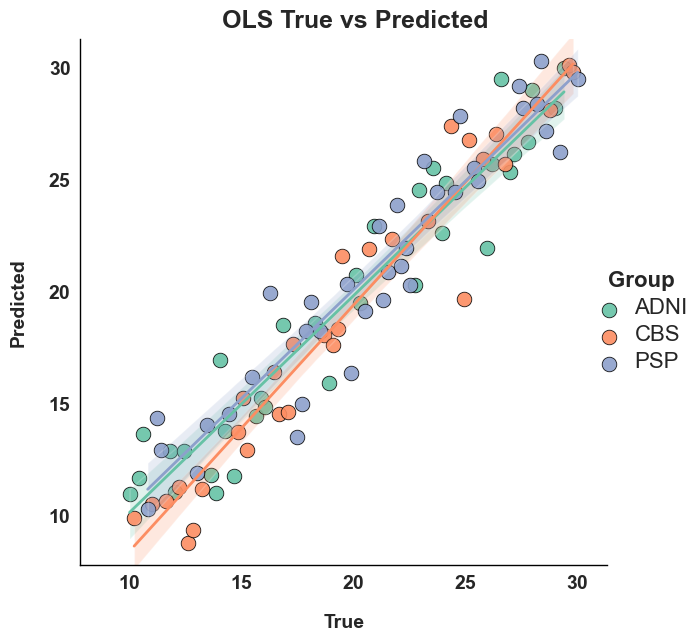

In [50]:
# Simulate fake data
np.random.seed(42)
n_samples = 100
true_values = np.linspace(10, 30, n_samples)
noise = np.random.normal(0, 2, n_samples)
predicted_values = true_values + noise
residuals = predicted_values - true_values

# Optional group labels (3 classes)
group_labels = np.random.choice(['ADNI', 'CBS', 'PSP'], size=n_samples)

# Call the function with group coloring enabled
plot_ols_diagnostics(
    target=true_values,
    predictions=predicted_values,
    residuals=residuals,
    title="",
    plot_flag=True,
    save_flag=False,
    color_by_group=True,
    group_labels=group_labels
)